In [1]:
from IFneuron import *

### Make neurons

In [27]:
Neuron_A = IFneuron('A')
Neuron_B = IFneuron('B')
Neuron_C = IFneuron('C')
Neuron_D = IFneuron('D')
Neuron_E = IFneuron('E')

### Making connections

The `IFneuron.receptors` list will contain tuples of the form:
```
(neuron_ref, weight)
```
Where `neuron_ref` is a reference to an `IFneuron` object and
`weight` is a connection weighting such as 1.0. <br>

The `neuron_ref` is a source of synaptic input, i.e. the
receptors list is listing all of the neurons from which the
current neuron object will be receiving input.

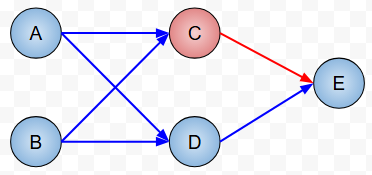

In [29]:
# Store the weights in a data structure so I can change them later

Neuron_E.receptors = [(Neuron_D, 1.0), (Neuron_C, -1.0)] # Neuron_C weight = -1 acting as inhibitory
print(f'Neuron E <- {Neuron_E.receptors[0][0].id}')
print(f'Neuron E <- {Neuron_E.receptors[1][0].id}')

Neuron_C.receptors = [(Neuron_A, .7), (Neuron_B, .7)]
Neuron_D.receptors = [(Neuron_A, 1.0), (Neuron_B, 1.0)]


Neuron E <- D
Neuron E <- C


### Making stimulation protocol

Direct stimulation assumes that each specific neuron can receive
input that will force it to fire (spike) at precise times
during the simulation. (E.g. as via patch-clamping.)

The stimulation times are contained in the list at `IFneuron.t_directstim_ms`.
You can set that variable or use the `IFneuron.attach_direct_stim`
function to do so.

In [41]:
stim_a = [25, 350, 700, 1000, 1400, 2000]
stim_b = [20, 450, 700, 1000, 1300, 2200]

for i in stim_a:
    Neuron_A.attach_direct_stim(i)

for i in stim_b:
    Neuron_B.attach_direct_stim(i)

### Run the experiment

Run the experiment at a sensible update step size, e.g. 1 ms per step
by calling `IFneuron.update()`. 

Note the parameters. You have to
include the time (`t_ms`) of this step in the experiment, and you
need to indicate if the updated membrane potential should be
recorded.


Note that spike times are automatically collected in `IFneuron.t_act_ms`.
If membrane potential is being recorded, then the times of recordings
are stored in `IFneuron.t_recorded_ms` and the corresponding membrane
potentials in `IFneuron.Vm_recorded`.

-------

**NOTE**: Had to comment out lines 147 - 149 of IFneuron.py because self.FIFO is not defined. Ask Randal about this later if still confused.

In [49]:
run_time_ms = 3500
neurons = [Neuron_A, Neuron_B, Neuron_C, Neuron_D, Neuron_E]

for step in range(run_time_ms):
    for i in neurons:
        i.update(step, True)

### Show simulation

In [45]:
# Experimental data collection
ground_truth_system = {'A':[],
                       'B':[],
                       'C':[],
                       'D':[],
                       'E':[],}
for neuron in neurons:
    ground_truth_system[neuron.id] = neuron.t_act_ms
    # print(f'Neuron {neuron.id} fired at {neuron.t_act_ms}ms')
print(ground_truth_system)

{'A': [25, 350, 700, 1000, 1400, 2000, 250, 350, 700, 1000, 1400, 2000], 'B': [20, 450, 700, 1000, 1300, 2200, 200, 450, 700, 1000, 1300, 2200], 'C': [27, 704, 1004], 'D': [26, 357, 458, 702, 1002, 1307, 1408, 2007, 2207], 'E': [364, 467, 1314, 1417, 2014, 2214]}


<function matplotlib.pyplot.show(close=None, block=None)>

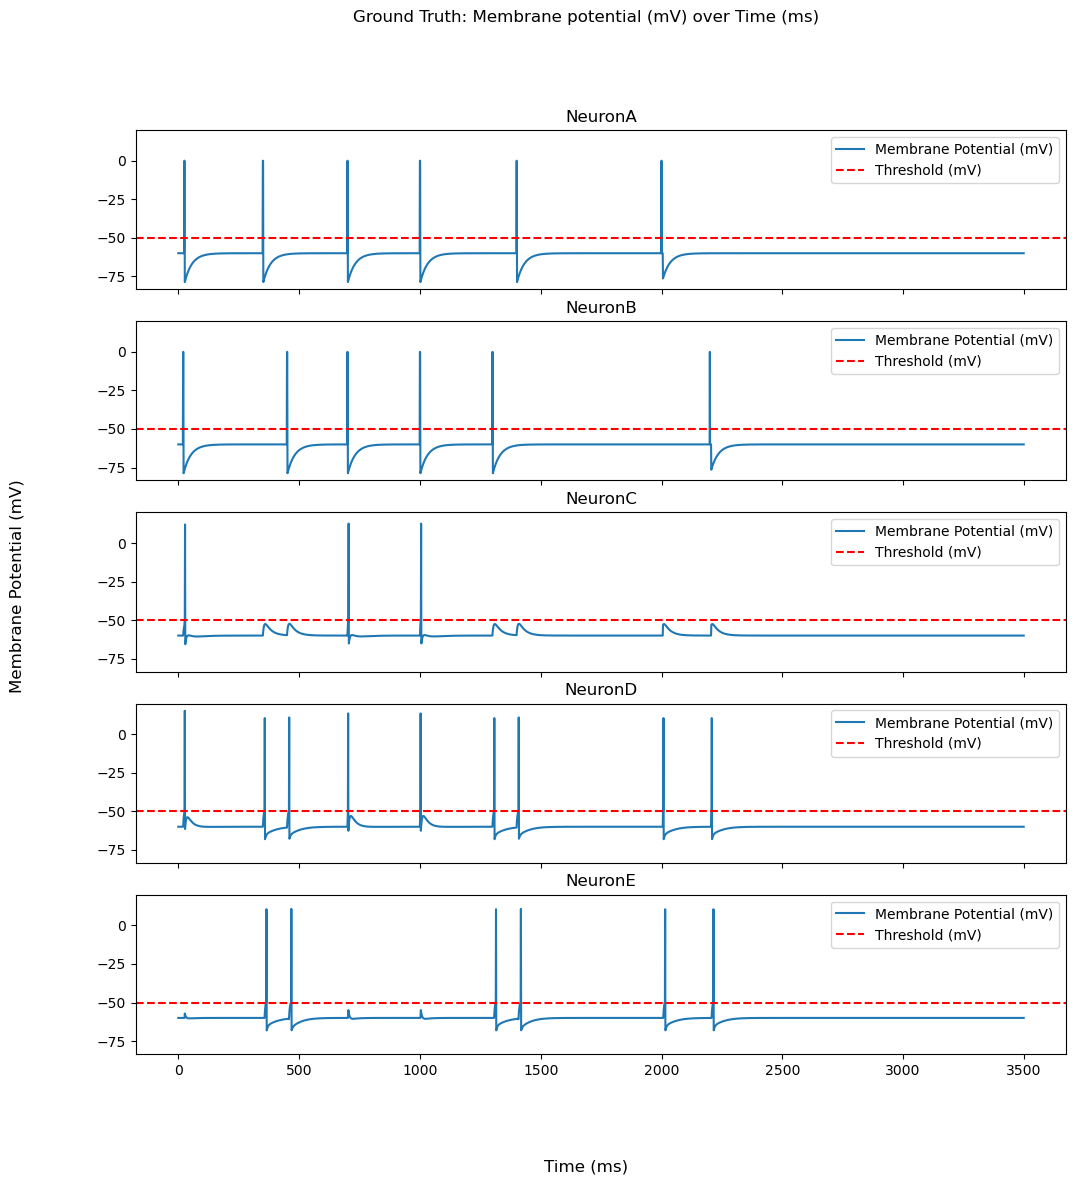

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(neurons), figsize=(12,12), sharex=True, sharey=True)

fig.suptitle('Ground Truth: Membrane potential (mV) over Time (ms)')
fig.supxlabel('Time (ms)')
fig.supylabel('Membrane Potential (mV)')

labels = ['Membrane Potential (mV)', 'Threshold (mV)']
for i, neuron in enumerate(neurons):
    ax[i].plot(neuron.t_recorded_ms, neuron.Vm_recorded, label=labels[0])
    ax[i].axhline(neuron.Vact_mV, label=labels[1], linestyle='--', color='r')
    ax[i].set_title(f'Neuron{neuron.id}')
    ax[i].legend(loc='upper right')

plt.show

### Reconstructed system

<function matplotlib.pyplot.show(close=None, block=None)>

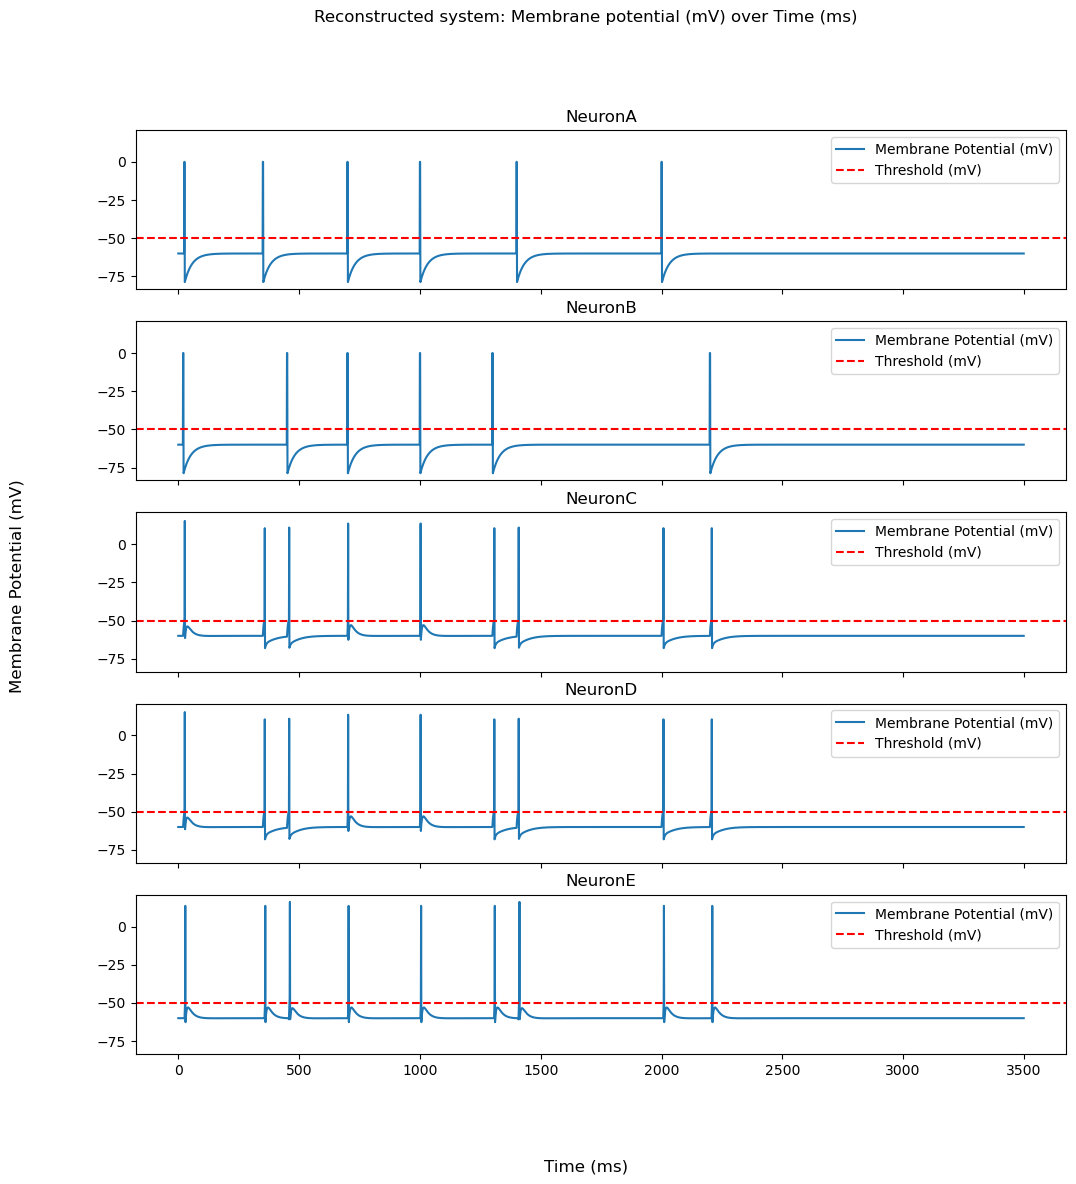

In [14]:
Neuron_A = IFneuron('A')
Neuron_B = IFneuron('B')
Neuron_C = IFneuron('C')
Neuron_D = IFneuron('D')
Neuron_E = IFneuron('E')

# Store the weights in a data structure so I can change them later

Neuron_E.receptors = [(Neuron_D, 1.0), (Neuron_C, 1.0)] # Neuron_C weight = -1 acting as inhibitory
Neuron_C.receptors = [(Neuron_A, 1.0), (Neuron_B, 1.0)]
Neuron_D.receptors = [(Neuron_A, 1.0), (Neuron_B, 1.0)]

stim_a = [25, 350, 700, 1000, 1400, 2000]
stim_b = [20, 450, 700, 1000, 1300, 2200]

for i in stim_a:
    Neuron_A.attach_direct_stim(i)

for i in stim_b:
    Neuron_B.attach_direct_stim(i)

run_time_ms = 3500
neurons = [Neuron_A, Neuron_B, Neuron_C, Neuron_D, Neuron_E]

for step in range(run_time_ms):
    for i in neurons:
        i.update(step, True)

fig, ax = plt.subplots(len(neurons), figsize=(12,12), sharex=True, sharey=True)

fig.suptitle('Reconstructed system: Membrane potential (mV) over Time (ms)')
fig.supxlabel('Time (ms)')
fig.supylabel('Membrane Potential (mV)')

labels = ['Membrane Potential (mV)', 'Threshold (mV)']
for i, neuron in enumerate(neurons):
    ax[i].plot(neuron.t_recorded_ms, neuron.Vm_recorded, label=labels[0])
    ax[i].axhline(neuron.Vact_mV, label=labels[1], linestyle='--', color='r')
    ax[i].set_title(f'Neuron{neuron.id}')
    ax[i].legend(loc='upper right')

plt.show

In [15]:
# Experimental data collection
reconstructed_system = {'A':[],
                       'B':[],
                       'C':[],
                       'D':[],
                       'E':[],}
for neuron in neurons:
    reconstructed_system[neuron.id] = neuron.t_act_ms
    # print(f'Neuron {neuron.id} fired at {neuron.t_act_ms}ms')
print(reconstructed_system)

{'A': [25, 350, 700, 1000, 1400, 2000], 'B': [20, 450, 700, 1000, 1300, 2200], 'C': [26, 357, 458, 702, 1002, 1307, 1408, 2007, 2207], 'D': [26, 357, 458, 702, 1002, 1307, 1408, 2007, 2207], 'E': [28, 359, 461, 704, 1004, 1309, 1411, 2009, 2209]}


(0.0, 3500.0)

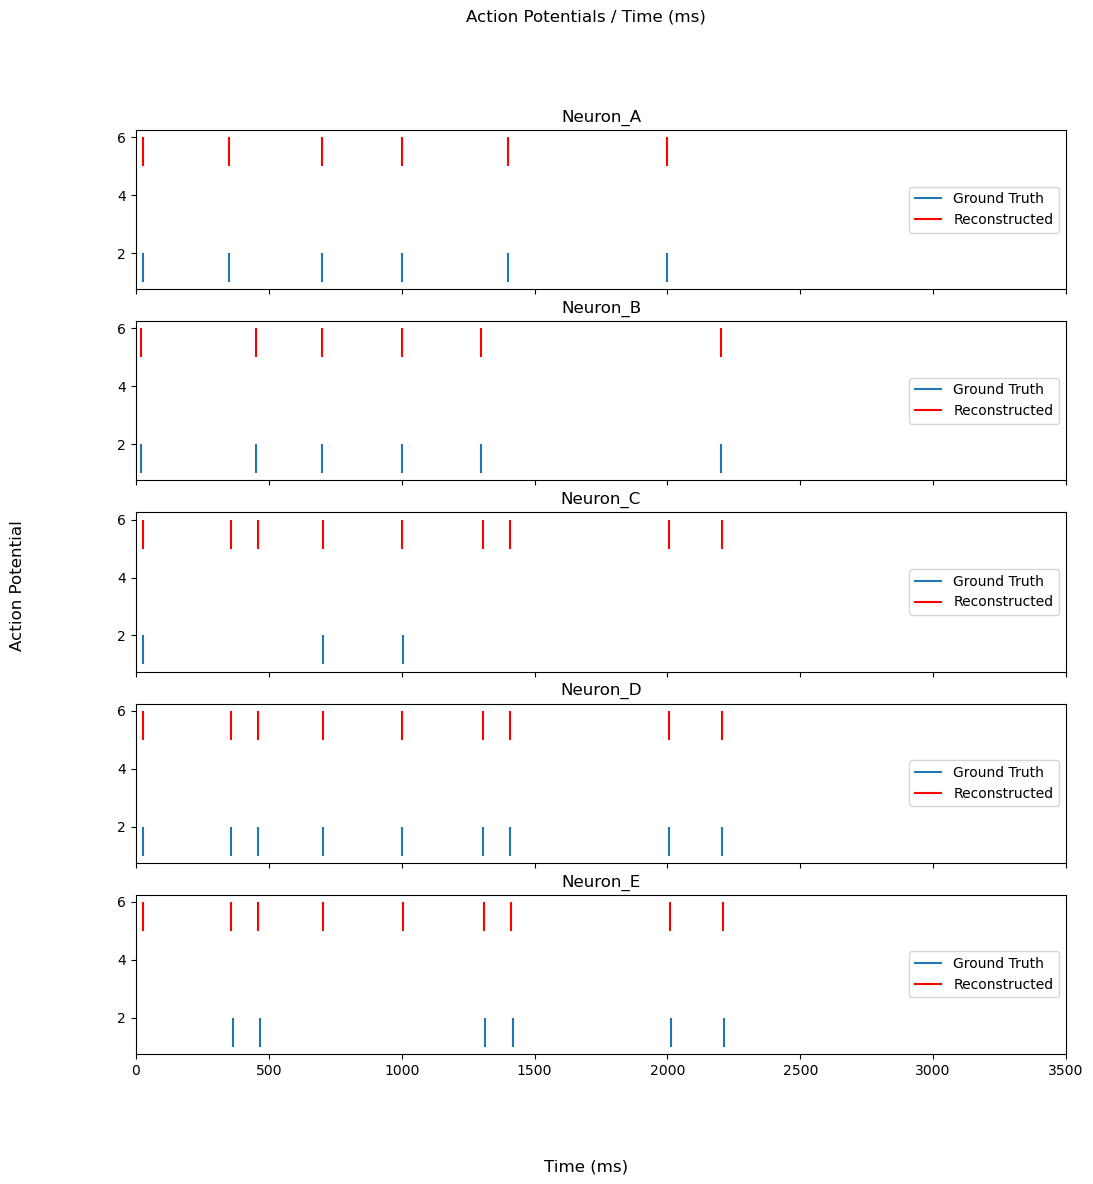

In [16]:
fig, ax = plt.subplots(len(neurons), figsize=(12,12), sharex=True, sharey=True)

fig.suptitle('Action Potentials / Time (ms)')
fig.supxlabel('Time (ms)')
fig.supylabel('Action Potential')

labels = ['Membrane Potential (mV)', 'Threshold (mV)']

for i, neuron in enumerate(ground_truth_system):
    # print(ground_truth_system[neuron])
    ax[i].vlines(ground_truth_system[neuron], 1, 2, label='Ground Truth')
    ax[i].set_title(f'Neuron_{neuron}')
    ax[i].legend(loc='center right')

for i, neuron in enumerate(reconstructed_system):
    # print(reconstructed_system[neuron])
    ax[i].vlines(reconstructed_system[neuron], 5, 6, color='r', label='Reconstructed')
    ax[i].set_title(f'Neuron_{neuron}')
    ax[i].legend(loc='center right')
    
ax = plt.gca()
ax.set_xlim([0, run_time_ms])

In [99]:
def simulate_and_plot(stim_times, sim_duration=100):
    n = IFneuron("test_neuron")
    for t in stim_times:
        n.attach_direct_stim(t)
    for t in range(sim_duration):
        n.update(t, recording=True)

    plt.plot(n.t_recorded_ms, n.Vm_recorded)
    plt.title("Simulation with Stim Times: " + str(stim_times))
    plt.xlabel("Time (ms)")
    plt.ylabel("Vm (mV)")
    plt.axhline(neuron.Vact_mV, label=labels[1], linestyle='--', color='r')
    plt.grid(True)
    plt.show()

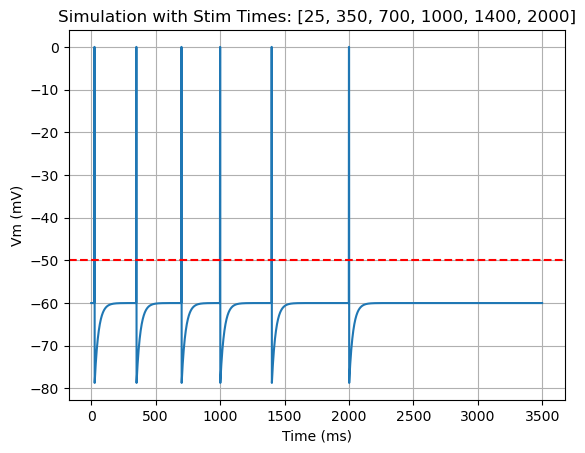

In [101]:
simulate_and_plot([25, 350, 700, 1000, 1400, 2000],3500)

In [103]:
gt = IFneuron("ground_truth")
for t in [25, 350, 700, 1000]:
    gt.attach_direct_stim(t)

rc = IFneuron("reconstruction")
for t in [30, 355, 700, 1010]: 
    rc.attach_direct_stim(t)

# Run both simulations
for t in range(0, 1200):
    gt.update(t, recording=True)
    rc.update(t, recording=True)

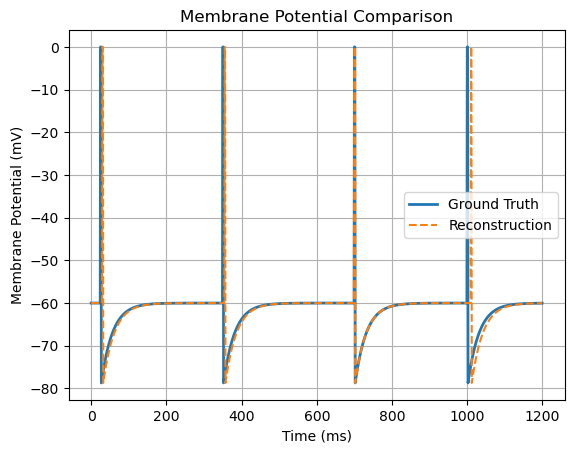

In [105]:
plt.plot(gt.t_recorded_ms, gt.Vm_recorded, label='Ground Truth', linewidth=2)
plt.plot(rc.t_recorded_ms, rc.Vm_recorded, label='Reconstruction', linestyle='--')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential Comparison")
plt.legend()
plt.grid(True)
plt.show()

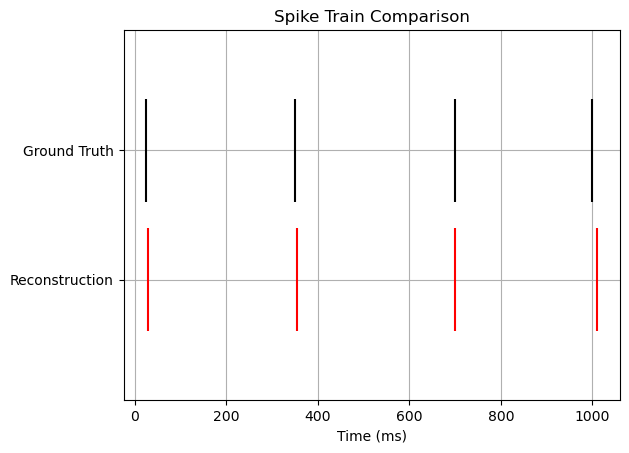

In [87]:
def plot_spike_trains(gt, rc):
    plt.eventplot([gt.t_act_ms, rc.t_act_ms], 
                  lineoffsets=[1, 0], 
                  colors=['black', 'red'], 
                  linelengths=0.8)
    plt.yticks([0, 1], ["Reconstruction", "Ground Truth"])
    plt.xlabel("Time (ms)")
    plt.title("Spike Train Comparison")
    plt.grid(True)
    plt.show()

plot_spike_trains(gt, rc)


In [89]:
def compare_spikes(gt_spikes, rc_spikes, tolerance=5):
    matches = 0
    used = set()
    for gt in gt_spikes:
        for i, rc in enumerate(rc_spikes):
            if abs(gt - rc) <= tolerance and i not in used:
                matches += 1
                used.add(i)
                break
    return matches, len(gt_spikes), len(rc_spikes)

matches, total_gt, total_rc = compare_spikes(gt.t_act_ms, rc.t_act_ms)
print(f"Spike Matches: {matches}/{total_gt} ground truth | {total_rc} reconstruction")


Spike Matches: 3/4 ground truth | 4 reconstruction
